In [1]:
import numpy as np
import pandas as pd

In [99]:
data=pd.read_csv(r'C:\Users\Shiva Chandra\Desktop\ML\Project Sem 2 Year 3\DATA-FINAL.csv')

In [3]:
data.shape

(65535, 22)

In [4]:
data.head()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG


In [5]:
data.columns.unique()

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'MHRDName', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')

In [6]:
data['MHRDName'].nunique()

135

In [7]:
data['ProgramType'].nunique()

2

In [152]:
data['ProgramType'].value_counts()

UG    64635
PG      900
Name: ProgramType, dtype: int64

In [8]:
data['Grade'].unique()

array(['O', 'A+', 'B+', 'A', 'F', 'E', 'C', 'D', 'B', 'R', 'I', 'FAIL',
       'ReApp', 'PASS', 'M', 'S'], dtype=object)

In [9]:
data['CourseType'].nunique()

2

In [158]:
data=data[data['CourseType']!='Practical']

In [159]:
data.isnull().sum()

Termid             0
Regd No            0
Course             0
Grade              0
CA_100             0
MTT_50         24555
ETT_100        23270
ETP_100        35890
Course_Att      4480
MHRDName           0
CA_1               0
CA_2               0
CA_3               0
CA_4               0
Height             0
Weight             0
ScholarType        0
Direction          0
Gender             0
Medium             0
CourseType         0
ProgramType        0
dtype: int64

In [11]:
data.describe()

,Termid,Regd No,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Height,Weight
count,65535.000000,6.553500e+04,62969.000000,38414.000000,39699.000000,29644.000000,59454.000000,62969.000000,62969.000000,62969.000000,62969.000000,65535.000000,65535.000000
mean,288099.682918,8.450856e+06,63.772317,26.110637,52.052470,67.181892,81.046692,31.961918,15.926504,7.937985,7.945910,167.077134,70.074922
std,84391.200813,4.155810e+06,23.809873,11.811316,22.972317,22.770638,17.960987,23.197636,16.421255,10.651955,10.654228,10.138942,17.785183
min,118192.000000,1.101776e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,40.000000
25%,218192.000000,4.875776e+06,54.000000,19.000000,40.000000,61.000000,76.000000,12.000000,3.000000,1.000000,1.000000,158.000000,55.000000
50%,318192.000000,8.474776e+06,69.000000,28.000000,56.000000,73.000000,85.000000,29.000000,10.000000,4.000000,4.000000,167.000000,70.000000
75%,318192.000000,1.203578e+07,81.000000,35.000000,68.000000,82.000000,93.000000,49.000000,24.000000,11.000000,11.000000,176.000000,85.000000
max,718192.000000,1.543278e+07,100.000000,50.000000,100.000000,100.000000,100.000000,100.000000,94.000000,89.000000,87.000000,184.000000,100.000000


In [120]:
result=data[data['Grade']=='E']
result

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
14,418192,1104776,XPH11,E,0.0,NaN,0.0,NaN,0.0,Bachelor of Technology in Mechanical Engineering,...,0.0,0.0,163,67,Day Scholar,East,Male,English,Theory,UG
15,418192,1104776,XPH8,E,0.0,0.0,0.0,NaN,0.0,Bachelor of Technology in Mechanical Engineering,...,0.0,0.0,163,67,Day Scholar,East,Male,English,Theory,UG
16,418192,1104776,XPH9,E,0.0,NaN,NaN,0.0,0.0,Bachelor of Technology in Mechanical Engineering,...,0.0,0.0,163,67,Day Scholar,East,Male,English,Theory,UG
20,218192,1107776,KNF22,E,72.0,14.0,6.0,NaN,77.0,Bachelor of Technology (Electrical and Electro...,...,10.0,9.0,158,70,Hostler,East,Male,Regional,Theory,UG
22,218192,1107776,KNF24,E,55.0,NaN,NaN,15.0,98.0,Bachelor of Technology (Electrical and Electro...,...,2.0,1.0,158,70,Hostler,East,Male,Regional,Theory,UG
59,318192,1114776,FDT60,E,42.0,8.0,19.0,NaN,92.0,Bachelor of Technology (Chemical Engineering),...,11.0,0.0,180,73,Day Scholar,East,Female,English,Theory,UG
117,518192,1124776,IAD103,E,83.0,15.0,22.0,NaN,82.0,Bachelor of Technology (Information Technology),...,9.0,3.0,169,54,Day Scholar,East,Male,Regional,Theory,UG
170,318192,1135776,KVY97,E,80.0,23.0,25.0,59.0,84.0,Bachelor of Science (Honours) (Agriculture),...,2.0,15.0,150,70,Hostler,South,Female,Hindi,Theory,UG
241,318192,1161776,IIN156,E,70.0,7.0,29.0,NaN,76.0,Bachelor of Technology (Electronics and Commun...,...,8.0,1.0,150,95,Hostler,South,Male,English,Theory,UG
242,318192,1161776,IIN157,E,32.0,15.0,23.0,NaN,77.0,Bachelor of Technology (Electronics and Commun...,...,9.0,1.0,150,95,Hostler,South,Male,English,Theory,UG


In [13]:
result=data[data['MHRDName']=='Dual Degree Bachelor of Technology - Master of Technology (Mechanical Engineering)']

In [82]:
result

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
38833,418192,9875776,XHQ10,F,0.0,NaN,NaN,84.0,NaN,Dual Degree Bachelor of Technology - Master of...,...,0.0,0.0,157,72,Day Scholar,West,Male,Regional,Theory,UG
38834,418192,9875776,XHQ11,E,77.0,NaN,0.0,NaN,94.0,Dual Degree Bachelor of Technology - Master of...,...,0.0,4.0,157,72,Day Scholar,West,Male,Regional,Theory,UG
38835,418192,9875776,XHQ245,E,72.0,15.0,12.0,NaN,98.0,Dual Degree Bachelor of Technology - Master of...,...,15.0,1.0,157,72,Day Scholar,West,Male,Regional,Theory,UG
38836,418192,9875776,XHQ246,B+,72.0,28.0,62.0,NaN,93.0,Dual Degree Bachelor of Technology - Master of...,...,2.0,1.0,157,72,Day Scholar,West,Male,Regional,Theory,UG
40904,418192,10373776,XHQ10,O,83.0,NaN,NaN,90.0,NaN,Dual Degree Bachelor of Technology - Master of...,...,6.0,0.0,152,74,Hostler,North,Female,Regional,Theory,UG
40905,418192,10373776,XHQ11,A,87.0,NaN,60.0,NaN,84.0,Dual Degree Bachelor of Technology - Master of...,...,1.0,6.0,152,74,Hostler,North,Female,Regional,Theory,UG
40906,418192,10373776,XHQ245,O,95.0,43.0,83.0,NaN,78.0,Dual Degree Bachelor of Technology - Master of...,...,20.0,15.0,152,74,Hostler,North,Female,Regional,Theory,UG
40907,418192,10373776,XHQ246,A+,97.0,48.0,73.0,NaN,83.0,Dual Degree Bachelor of Technology - Master of...,...,11.0,24.0,152,74,Hostler,North,Female,Regional,Theory,UG


In [14]:
result.shape

(8, 22)

In [15]:
df=data[['Grade','CA_100','MTT_50','ETT_100','ETP_100','Course_Att','CA_1','CA_2','CA_3','CA_4','Gender']]

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.head()

,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Gender
0,O,87.0,39.0,82.0,89.0,88.0,41.0,45.0,1.0,0.0,Female
1,A+,87.0,47.0,65.0,85.0,82.0,86.0,0.0,0.0,1.0,Female
2,B+,84.0,29.0,63.0,77.0,76.0,76.0,0.0,3.0,5.0,Female
3,A+,NaN,NaN,NaN,82.0,74.0,NaN,NaN,NaN,NaN,Female
4,A+,87.0,34.0,68.0,89.0,76.0,42.0,26.0,2.0,17.0,Female


In [18]:
import matplotlib.pyplot as plt
x=df['Grade'].unique()
y=df['Grade'].value_counts()
ax=y.plot.bar(x=df['Grade'].unique(),y=df['Grade'].value_counts(),figsize=(25,10),color='m')

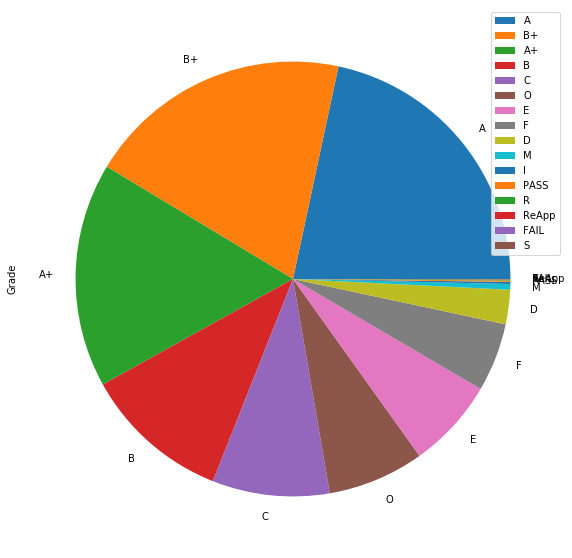

In [19]:
import matplotlib.pyplot as plt
x=df['Grade'].unique()
y=df['Grade'].value_counts()
ax=y.plot.pie(x=df['Grade'].unique(),y=df['Grade'].value_counts(),rot=0,figsize=(25,10))
plt.legend()

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location ''. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


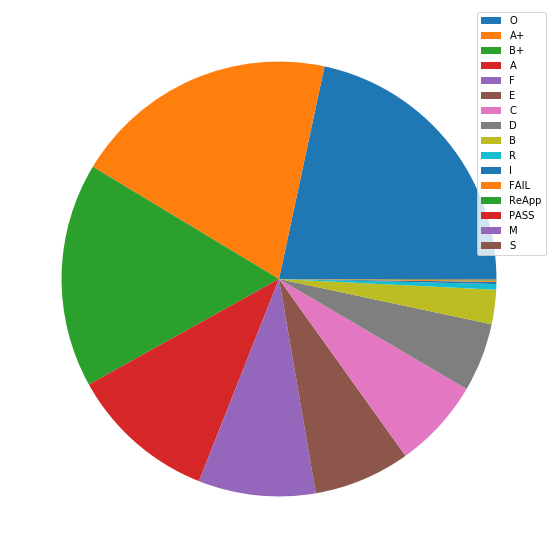

In [20]:

#plt.figure(20,10)
plt.figure(figsize=(25,10))
plt.pie(x=df['Grade'].value_counts())
plt.legend(df['Grade'].unique(),loc='')
plt.show()

In [21]:
df.isnull().sum()

Grade             0
CA_100         2566
MTT_50        27121
ETT_100       25836
ETP_100       35891
Course_Att     6081
CA_1           2566
CA_2           2566
CA_3           2566
CA_4           2566
Gender            0
dtype: int64

In [22]:
df1=df.dropna()

In [23]:
df1.head()

,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,CA_2,CA_3,CA_4,Gender
0,O,87.0,39.0,82.0,89.0,88.0,41.0,45.0,1.0,0.0,Female
1,A+,87.0,47.0,65.0,85.0,82.0,86.0,0.0,0.0,1.0,Female
2,B+,84.0,29.0,63.0,77.0,76.0,76.0,0.0,3.0,5.0,Female
4,A+,87.0,34.0,68.0,89.0,76.0,42.0,26.0,2.0,17.0,Female
5,A+,97.0,33.0,75.0,96.0,80.0,74.0,23.0,0.0,0.0,Female


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df1['Grade']=le.fit_transform(df1['Grade'])

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df1['Gender']=le.fit_transform(df1['Gender'])

C:\Users\Shiva Chandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [202]:
df1.head()
y=arr
x=result

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [204]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [205]:
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)


In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9733177144344657

In [207]:
y_pred
for i in range(0,len(y_pred)):
    print(y_pred[i],"     ",y_test.iloc[i])

1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
0       0
1       1
0       0
0       0
1       1
0       1
1       1
0       0
1       1
1       1
1       1
1       1
0       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       1
1       1
1       1
1       1
0       1
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       1
1       1
1       1


1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0


1       1
1       1
1       1
1       1
0       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
0       0
0       0
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
0       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
0       1
0       0
1       1
0       0
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1


1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0
1       1
0       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       0
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
1       1
0       0


In [208]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[1009,  128],
       [  77, 6469]], dtype=int64)

In [209]:
data['Grade'].unique()

array(['O', 'A+', 'B+', 'A', 'F', 'E', 'C', 'D', 'B', 'R', 'I', 'FAIL',
       'ReApp', 'PASS', 'M', 'S'], dtype=object)

In [100]:
abc=[]
for i in range(data.shape[0]):
    if(data.loc[i,'Grade'])=='ReApp' or (data.loc[i,'Grade'])=='FAIL' or (data.loc[i,'Grade'])=='F' or (data.loc[i,'Grade'])=='E':
        abc.append('Fail')
    else:
        abc.append('Passed')

In [101]:
abc

['Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Passed',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Fail',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 'Passed',
 '

In [102]:
data['Grade'].value_counts()

A        14184
B+       12924
A+       10946
B         7163
C         5710
O         4701
E         4378
F         3338
D         1674
M          276
I          101
PASS        64
R           52
ReApp       15
FAIL         6
S            3
Name: Grade, dtype: int64

In [103]:
df1=pd.DataFrame(abc,columns=['Result'])

In [154]:
df=pd.concat([data,df1],axis=1)

In [155]:
data['CourseType'].value_counts()

Theory       62969
Practical     2566
Name: CourseType, dtype: int64

In [156]:
cols=['ETP_100','CA_1','CA_2','CA_3','CA_4','Height','Weight','Direction','Course','Termid','Regd No','Gender','ProgramType'
      ,'ScholarType','Medium','CourseType']
df.drop(cols,axis=1,inplace =True)

In [157]:
df.head()

,Grade,CA_100,MTT_50,ETT_100,Course_Att,MHRDName,Result
0,O,87.0,39.0,82.0,88.0,Bachelor of Science (Honours) (Agriculture),Passed
1,A+,87.0,47.0,65.0,82.0,Bachelor of Science (Honours) (Agriculture),Passed
2,B+,84.0,29.0,63.0,76.0,Bachelor of Science (Honours) (Agriculture),Passed
3,A+,NaN,NaN,NaN,74.0,Bachelor of Science (Honours) (Agriculture),Passed
4,A+,87.0,34.0,68.0,76.0,Bachelor of Science (Honours) (Agriculture),Passed


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [177]:

df['Result']=le.fit_transform(df['Result'])

In [151]:
print(df.shape[0])
val=0
for i in range(df.shape[0]):
    if (df.loc[i,'Medium'])=='English' and (df.loc[i,'Result'])=='Fail':
        val+=1
        
val

65535


2382

In [143]:
df['Gender'].value_counts()

Male      32817
Female    32718
Name: Gender, dtype: int64

In [74]:
df.isnull().sum()

Termid             0
Regd No            0
Course             0
Grade              0
CA_100          2566
MTT_50         27121
ETT_100        25836
ETP_100        35891
Course_Att      6081
MHRDName           0
CA_1            2566
CA_2            2566
CA_3            2566
CA_4            2566
Height             0
Weight             0
ScholarType        0
Direction          0
Gender             0
Medium             0
CourseType         0
ProgramType        0
Result             0
dtype: int64

In [107]:
df=df[df.isnull().sum(axis=1)<3]

In [108]:
df.isnull().sum()

Termid             0
Regd No            0
Course             0
Grade              0
CA_100             0
MTT_50         20075
ETT_100        18790
ETP_100        35860
Course_Att         0
MHRDName           0
CA_1               0
CA_2               0
CA_3               0
CA_4               0
Height             0
Weight             0
ScholarType        0
Direction          0
Gender             0
Medium             0
CourseType         0
ProgramType        0
Result             0
dtype: int64

In [109]:
df['ScholarType'].value_counts()

Day Scholar    30047
Hostler        28442
Name: ScholarType, dtype: int64

In [112]:
df['Result'].value_counts()

Passed    51019
Fail       7470
Name: Result, dtype: int64

In [110]:
df.shape

(58489, 23)

In [160]:
df.head()

,Grade,CA_100,MTT_50,ETT_100,Course_Att,MHRDName,Result
0,O,87.0,39.0,82.0,88.0,Bachelor of Science (Honours) (Agriculture),Passed
1,A+,87.0,47.0,65.0,82.0,Bachelor of Science (Honours) (Agriculture),Passed
2,B+,84.0,29.0,63.0,76.0,Bachelor of Science (Honours) (Agriculture),Passed
3,A+,NaN,NaN,NaN,74.0,Bachelor of Science (Honours) (Agriculture),Passed
4,A+,87.0,34.0,68.0,76.0,Bachelor of Science (Honours) (Agriculture),Passed


In [163]:
df.isnull().sum()

Grade             0
CA_100         2566
MTT_50        27121
ETT_100       25836
Course_Att     6081
MHRDName          0
Result            0
dtype: int64

In [199]:
result=df.dropna()
arr=result['Result']
result=result.drop(['MHRDName','Grade','Result'],axis=1)

In [191]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [192]:
abc=ss.fit_transform(result)
abc.reshape(-1,1)
abc.shape
cols=result.columns
result=pd.DataFrame(abc,columns=cols)

In [193]:
result.head()

,CA_100,MTT_50,ETT_100,Course_Att
0,1.099857,1.091287,1.305924,0.447171
1,1.099857,1.768612,0.564969,0.112662
2,0.976868,0.244630,0.477798,-0.221846
3,1.099857,0.667958,0.695726,-0.221846
4,1.509819,0.583293,1.000825,0.001160


In [194]:
result.describe()

,CA_100,MTT_50,ETT_100,Course_Att
count,3.841400e+04,3.841400e+04,3.841400e+04,3.841400e+04
mean,-2.294859e-15,2.332280e-15,-1.425654e-15,-3.176884e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.466813e+00,-2.210675e+00,-2.268095e+00,-4.458950e+00
25%,-4.989949e-01,-6.020268e-01,-5.246713e-01,-2.775973e-01
50%,1.979406e-01,1.599642e-01,1.726983e-01,2.241651e-01
75%,7.718875e-01,7.526239e-01,6.957255e-01,6.144247e-01
max,1.632808e+00,2.022609e+00,2.090465e+00,1.116187e+00


In [201]:
arr.shape

(38414,)